# Tutorial: Bagging in Action: The Random Forest Regressor

Selamat datang di salah satu algoritma *machine learning* yang paling kuat, serbaguna, dan populer: **Random Forest**.

Random Forest adalah implementasi dari teknik **Bagging (Bootstrap Aggregating)**. Ia mengambil ide "kebijaksanaan orang banyak" ke tingkat berikutnya dengan melatih ratusan atau bahkan ribuan Decision Tree pada berbagai subset data, lalu merata-ratakan prediksi mereka untuk menghasilkan jawaban akhir yang sangat stabil dan akurat.

Di notebook ini, kita akan membedah cara kerja Random Forest dan mengimplementasikannya secara praktis.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan cara kerja **Bagging (Bootstrap Aggregating)**.
* Menjelaskan inovasi utama yang membuat Random Forest "random".
* Mengimplementasikan `RandomForestRegressor` dari Scikit-learn.
* Memvisualisasikan bagaimana prediksi Random Forest jauh lebih mulus dan stabil daripada satu Decision Tree.
* Mengidentifikasi hyperparameter kunci untuk *tuning* Random Forest.


---
### 2. Bagaimana Random Forest Bekerja?

Random Forest menggunakan dua trik utama untuk memastikan "kerumunan" pohonnya beragam:

**1. Bootstrap Aggregating (Bagging):**
   * **Bootstrap:** Alih-alih melatih setiap pohon pada seluruh dataset, Random Forest membuat banyak **subset acak** dari data pelatihan. Setiap subset memiliki ukuran yang sama dengan data asli, tetapi dibuat dengan mengambil sampel **dengan penggantian** (*with replacement*). Artinya, beberapa baris data mungkin muncul beberapa kali dalam satu subset, sementara yang lain mungkin tidak muncul sama sekali.
   * **Aggregating:** Setelah semua pohon dilatih secara independen pada subset mereka masing-masing, prediksi mereka **diagregasi** (dirata-ratakan untuk regresi) untuk menghasilkan prediksi akhir.

**2. Random Feature Subspace:**
   * Ini adalah inovasi kunci dari Random Forest. Saat membangun setiap pohon, di setiap **simpul keputusan (node)**, pohon tidak diizinkan untuk mempertimbangkan *semua* fitur.
   * Sebaliknya, ia hanya diizinkan untuk memilih dari **subset acak fitur**. Misalnya, jika Anda memiliki 10 fitur, di setiap *split*, pohon mungkin hanya diizinkan untuk memilih fitur terbaik dari 3 fitur yang dipilih secara acak.
   * Ini memaksa pohon-pohon untuk menjadi lebih beragam, karena mereka tidak selalu bisa mengandalkan fitur yang sama dan paling prediktif setiap saat.

Kombinasi dari dua sumber keacakan ini menghasilkan ratusan pohon yang sangat beragam, yang saat digabungkan, menciptakan model yang sangat kuat dan tahan terhadap overfitting.


---
### 3. Setup dan Data

Kita akan menggunakan kembali data non-linear kita untuk melihat seberapa baik Random Forest dapat menangkap pola kurva.


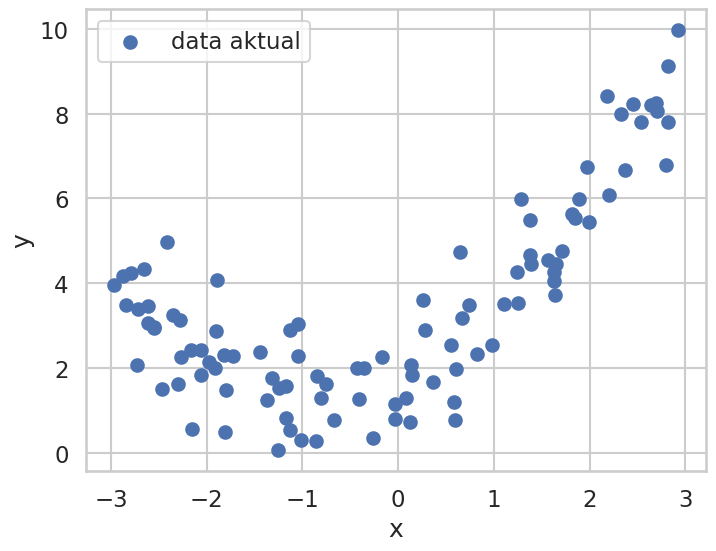

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
Y = Y.ravel() # Mengubah y menjadi array 1D, praktik yang baik untuk Scikit-learn

# Lakukan Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X,Y,label="data aktual")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


---
### 4. Implementasi dengan `RandomForestRegressor`

Menggunakan Random Forest di Scikit-learn sangatlah mudah.

**Hyperparameter Kunci:**
* **`n_estimators`**: Jumlah pohon dalam "hutan". Ini adalah hyperparameter yang paling penting. Semakin banyak pohon, semakin baik performanya (hingga titik tertentu), tetapi juga semakin lama waktu pelatihannya. Nilai defaultnya adalah 100.
* **`max_features`**: Jumlah fitur acak yang dipertimbangkan di setiap *split*.
* **`max_depth`**, **`min_samples_leaf`**, dll.: Hyperparameter regularisasi yang sama seperti pada satu Decision Tree, yang sekarang diterapkan pada setiap pohon di hutan.


In [7]:
# insialisasi model random forest
# n_estimator = banyaknya pohon, n_estimator = 500, 500 pohon
# n_jobs = -1, semua core CPU akan digunakan untuk pelatihan
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

rf_reg.fit(X_train,Y_train)

print("model random forest berhasil") 

model random forest berhasil


---
### 5. Membandingkan Prediksi: Satu Pohon vs. Hutan

Mari kita bandingkan prediksi dari Random Forest dengan prediksi dari satu Decision Tree yang tidak dibatasi (overfitting).

In [8]:
tree_reg_overfit = DecisionTreeRegressor(random_state=42)
tree_reg_overfit.fit(X_train,Y_train)

# data baru untuk plot
X_new = np.linspace(-3,3,100).reshape(-1,1)

# dapatkan prediksi kedua model
Y_pred_rf = rf_reg.predict(X_new)
Y_pred_tree = tree_reg_overfit.predict(X_new)

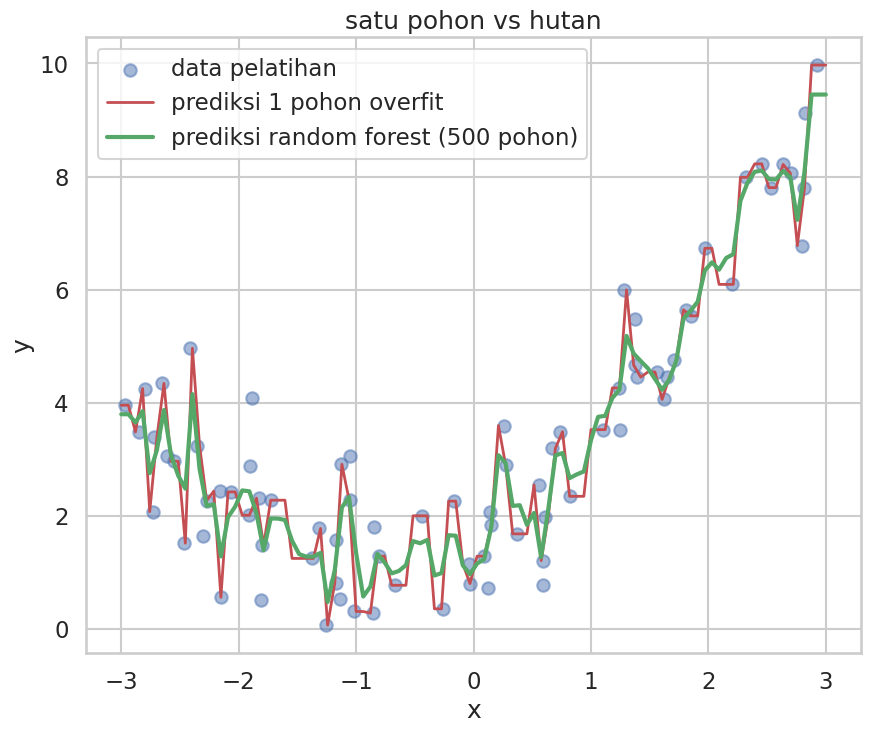

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X_train,Y_train, alpha=0.5, label='data pelatihan')
plt.plot(X_new,Y_pred_tree, 'r-', linewidth=2, label="prediksi 1 pohon overfit")
plt.plot(X_new,Y_pred_rf, 'g-', linewidth=3, label="prediksi random forest (500 pohon)")

plt.title("satu pohon vs hutan", fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Analisis:**

Perbedaannya sangat mencolok!
* **Garis Merah (1 Pohon):** Sangat "bergerigi" dan tidak stabil, jelas-jelas overfitting pada data pelatihan.
* **Garis Hijau (Random Forest):** Sangat **mulus** dan menangkap tren umum dari data dengan sangat baik. Ini adalah hasil dari merata-ratakan prediksi dari 500 pohon yang berbeda. Prediksi ini jauh lebih mungkin untuk menggeneralisasi dengan baik pada data baru.


---
### 6. Evaluasi Kuantitatif

Mari kita lihat skor R² pada data pengujian.


In [10]:
from sklearn.metrics import r2_score

# Prediksi pada data pengujian
Y_test_pred_rf = rf_reg.predict(X_test)
Y_test_pred_tree = tree_reg_overfit.predict(X_test)

# Hitung R²
r2_rf = r2_score(Y_test, Y_test_pred_rf)
r2_tree = r2_score(Y_test, Y_test_pred_tree)

print(f"Skor R² Random Forest: {r2_rf:.4f}")
print(f"Skor R² Satu Pohon:    {r2_tree:.4f}")

Skor R² Random Forest: 0.8297
Skor R² Satu Pohon:    0.7933


Hasil kuantitatif mengkonfirmasi apa yang kita lihat secara visual. Random Forest memiliki performa yang jauh lebih baik pada data pengujian karena kemampuannya untuk mengurangi varians dan mencegah overfitting.


### Kesimpulan

* **Random Forest** adalah model *ensemble* berbasis **Bagging** yang sangat kuat dan robust.
* Ia bekerja dengan merata-ratakan prediksi dari banyak Decision Tree yang beragam.
* Keragaman dicapai melalui **bootstrap sampling** dan **random feature subspaces**.
* Hasilnya adalah model yang sangat tahan terhadap overfitting dan seringkali memberikan performa yang sangat baik "langsung dari kotak" tanpa banyak *tuning*.

**Selanjutnya:**
Setelah mempelajari *bagging*, kita akan beralih ke keluarga *ensemble* besar lainnya: **Boosting**.
